In [1]:
from pandasql import sqldf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import io
import requests
from ast import literal_eval
import glob
import datetime

In [2]:
project_csv = pd.read_csv('../data/Hot-Stuff.csv')
project_csv

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8
...,...,...,...,...,...,...,...,...,...,...
327890,https://www.billboard.com/charts/hot-100/2018-...,10/20/2018,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,21.0,8,13
327891,http://www.billboard.com/charts/hot-100/1977-0...,5/21/1977,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10.0,10,13
327892,http://www.billboard.com/charts/hot-100/1981-0...,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,I Can't Stand ItEric Clapton And His Band,1,12.0,10,13
327893,http://www.billboard.com/charts/hot-100/1973-0...,9/29/1973,22,Here I Am Come & Take Me,Al Green,Here I Am Come & Take MeAl Green,1,16.0,10,13


In [3]:
project_csv = project_csv.dropna()
project_csv

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8
...,...,...,...,...,...,...,...,...,...,...
327890,https://www.billboard.com/charts/hot-100/2018-...,10/20/2018,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,21.0,8,13
327891,http://www.billboard.com/charts/hot-100/1977-0...,5/21/1977,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10.0,10,13
327892,http://www.billboard.com/charts/hot-100/1981-0...,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,I Can't Stand ItEric Clapton And His Band,1,12.0,10,13
327893,http://www.billboard.com/charts/hot-100/1973-0...,9/29/1973,22,Here I Am Come & Take Me,Al Green,Here I Am Come & Take MeAl Green,1,16.0,10,13


In [4]:
position = 'SELECT COUNT(Distinct WeekID) as count, Performer FROM project_csv GROUP BY Performer ORDER BY count DESC'
sqldf(position, globals())
position_df = sqldf(position, globals())
position_df

,count,Performer
0,773,Elton John
1,686,Kenny Chesney
2,661,Madonna
3,660,Tim McGraw
4,619,Keith Urban
...,...,...
9200,1,2Pac Duet With Mopreme
9201,1,21 Savage & Metro Boomin Featuring Young Thug
9202,1,"2 Chainz, Drake & Quavo"
9203,1,2 Chainz Featuring YG & Offset


In [5]:
position_head = position_df.head(20)

In [6]:
# Top 20 Total Weeks on Chart

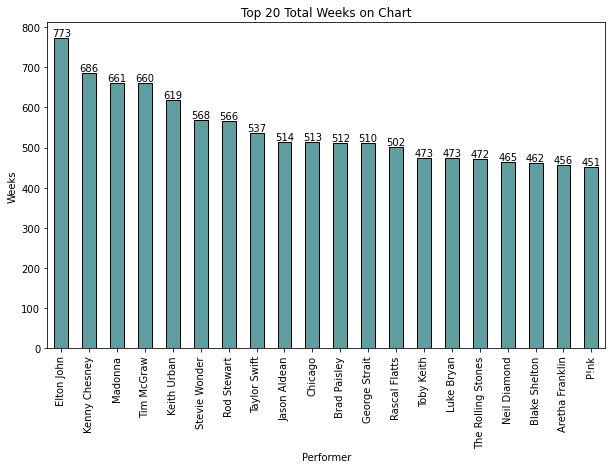

In [7]:
genre_graph_100 = position_head.plot(figsize=(10,6),
                             x= 'Performer',
                             y= 'count',
                             title = 'Top 20 Total Weeks on Chart',
                             xlabel = 'Performer',
                             ylabel = 'Weeks',
                             kind = 'bar',
                             color = 'cadetblue',
                             edgecolor = 'black')
genre_graph_100.get_legend().remove()
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

# new csvs

In [8]:
new_csvs = pd.concat([pd.read_csv(x)for x in glob.glob('../csvs_6/*.csv')], ignore_index = True)
new_csvs

,0,1,2,3,4,5
0,False,14.0,Dale & Grace,Stop and Think It Over,155013.0,spotify:track:2stpBzukWP5LxmqEY2k5vO
1,False,34.0,Bobby Vinton,Trouble Is My Middle Name,146626.0,spotify:track:5qAAs6ndwSQJ7YZ4wZ3Py8
2,False,10.0,Marianne Faithfull,Come And Stay With Me,144800.0,spotify:track:1D2VIwDVHzh5n7nkGk0vij
3,False,10.0,Bobby Sherman,Cried Like a Baby,196672.0,spotify:track:2s3AAZ3nRXseiqy3udyHbF
4,False,37.0,Wayne Newton,Red Roses For A Blue Lady,143066.0,spotify:track:5aKfKf7YIZOg0S8P1hNJjw
...,...,...,...,...,...,...
28384,False,42.0,Choirboys,Run to Paradise,251586.0,spotify:track:2b5Tg7SfwZF1UGFgqvtAO3
28385,False,15.0,Carrie Lucas,Dance with You,396200.0,spotify:track:273Yfa9Ie7uxzG7jbkf963
28386,NaN,NaN,NaN,NaN,NaN,NaN
28387,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
new_csvs = new_csvs.dropna()
new_csvs

,0,1,2,3,4,5
0,False,14.0,Dale & Grace,Stop and Think It Over,155013.0,spotify:track:2stpBzukWP5LxmqEY2k5vO
1,False,34.0,Bobby Vinton,Trouble Is My Middle Name,146626.0,spotify:track:5qAAs6ndwSQJ7YZ4wZ3Py8
2,False,10.0,Marianne Faithfull,Come And Stay With Me,144800.0,spotify:track:1D2VIwDVHzh5n7nkGk0vij
3,False,10.0,Bobby Sherman,Cried Like a Baby,196672.0,spotify:track:2s3AAZ3nRXseiqy3udyHbF
4,False,37.0,Wayne Newton,Red Roses For A Blue Lady,143066.0,spotify:track:5aKfKf7YIZOg0S8P1hNJjw
...,...,...,...,...,...,...
28380,False,41.0,Nocera,"Summertime, Summertime",206613.0,spotify:track:4tSteFXglCBaG6sFvYCBVX
28381,False,1.0,Andy Williams,Do You Mind - 1960 #70 Billboard chart hit,136560.0,spotify:track:4yzLxHEO5nPKwxjGYLF5xI
28384,False,42.0,Choirboys,Run to Paradise,251586.0,spotify:track:2b5Tg7SfwZF1UGFgqvtAO3
28385,False,15.0,Carrie Lucas,Dance with You,396200.0,spotify:track:273Yfa9Ie7uxzG7jbkf963


In [10]:
new_csvs.columns = ['Explicit', 'Song_Popularity', 'Performer', 'Song', 'Duration ms', 'uri' ]
new_csvs

,Explicit,Song_Popularity,Performer,Song,Duration ms,uri
0,False,14.0,Dale & Grace,Stop and Think It Over,155013.0,spotify:track:2stpBzukWP5LxmqEY2k5vO
1,False,34.0,Bobby Vinton,Trouble Is My Middle Name,146626.0,spotify:track:5qAAs6ndwSQJ7YZ4wZ3Py8
2,False,10.0,Marianne Faithfull,Come And Stay With Me,144800.0,spotify:track:1D2VIwDVHzh5n7nkGk0vij
3,False,10.0,Bobby Sherman,Cried Like a Baby,196672.0,spotify:track:2s3AAZ3nRXseiqy3udyHbF
4,False,37.0,Wayne Newton,Red Roses For A Blue Lady,143066.0,spotify:track:5aKfKf7YIZOg0S8P1hNJjw
...,...,...,...,...,...,...
28380,False,41.0,Nocera,"Summertime, Summertime",206613.0,spotify:track:4tSteFXglCBaG6sFvYCBVX
28381,False,1.0,Andy Williams,Do You Mind - 1960 #70 Billboard chart hit,136560.0,spotify:track:4yzLxHEO5nPKwxjGYLF5xI
28384,False,42.0,Choirboys,Run to Paradise,251586.0,spotify:track:2b5Tg7SfwZF1UGFgqvtAO3
28385,False,15.0,Carrie Lucas,Dance with You,396200.0,spotify:track:273Yfa9Ie7uxzG7jbkf963


# genre csvs

In [11]:
genre_csvs = pd.concat([pd.read_csv(x)for x in glob.glob('../genre_csvs/*.csv')], ignore_index = True)
genre_csvs

,0,1,2,3,4
0,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']"
1,NaN,NaN,NaN,NaN,NaN
2,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun..."
3,Zac Efron,69.0,Zac Efron,spotify:artist:6U1dBXJhC8gXFjamvFTmHg,"['hollywood', 'pop', 'post-teen pop', 'show tu..."
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
10056,The Yellow Balloon,22.0,The Yellow Balloon,spotify:artist:2EogrfOq2qlvRnJDaQ5BF0,"['bubblegum pop', 'freakbeat', 'sunshine pop']"
10057,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']"
10058,NaN,NaN,NaN,NaN,NaN
10059,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[]


In [12]:
genre_csvs = genre_csvs.dropna()
genre_csvs 

,0,1,2,3,4
0,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']"
2,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun..."
3,Zac Efron,69.0,Zac Efron,spotify:artist:6U1dBXJhC8gXFjamvFTmHg,"['hollywood', 'pop', 'post-teen pop', 'show tu..."
5,Kris Allen,44.0,Kris Allen,spotify:artist:2zwHaEmXxX6DTv4i8ajNCM,"['acoustic pop', 'idol', 'neo mellow', 'post-t..."
6,The Swon Brothers,33.0,The Swon Brothers,spotify:artist:1nf0nRF0W4ybnJdda00pKY,"['contemporary country', 'country pop', 'oklah..."
...,...,...,...,...,...
10053,Judson Spence,4.0,Judson Spence,spotify:artist:2iDXfUayTfaawalL8HDDj6,[]
10055,Mongo Santamaria Orch.,46.0,Mongo Santamaria,spotify:artist:2oVwztjpHpJlAvlVVuqVa0,"['afro-cuban percussion', 'boogaloo', 'cuban r..."
10056,The Yellow Balloon,22.0,The Yellow Balloon,spotify:artist:2EogrfOq2qlvRnJDaQ5BF0,"['bubblegum pop', 'freakbeat', 'sunshine pop']"
10057,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']"


In [13]:
genre_csvs.columns = ['Performer', 'Artist_Popularity', 'Performer2', 'uri', 'Genre' ]
genre_csvs

,Performer,Artist_Popularity,Performer2,uri,Genre
0,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']"
2,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun..."
3,Zac Efron,69.0,Zac Efron,spotify:artist:6U1dBXJhC8gXFjamvFTmHg,"['hollywood', 'pop', 'post-teen pop', 'show tu..."
5,Kris Allen,44.0,Kris Allen,spotify:artist:2zwHaEmXxX6DTv4i8ajNCM,"['acoustic pop', 'idol', 'neo mellow', 'post-t..."
6,The Swon Brothers,33.0,The Swon Brothers,spotify:artist:1nf0nRF0W4ybnJdda00pKY,"['contemporary country', 'country pop', 'oklah..."
...,...,...,...,...,...
10053,Judson Spence,4.0,Judson Spence,spotify:artist:2iDXfUayTfaawalL8HDDj6,[]
10055,Mongo Santamaria Orch.,46.0,Mongo Santamaria,spotify:artist:2oVwztjpHpJlAvlVVuqVa0,"['afro-cuban percussion', 'boogaloo', 'cuban r..."
10056,The Yellow Balloon,22.0,The Yellow Balloon,spotify:artist:2EogrfOq2qlvRnJDaQ5BF0,"['bubblegum pop', 'freakbeat', 'sunshine pop']"
10057,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']"


In [14]:
genre_csvs[['Performer', 'Genre', 'Artist_Popularity']]

,Performer,Genre,Artist_Popularity
0,Lindsay Lohan,"['dance pop', 'post-teen pop']",49.0
2,Incubus,"['alternative metal', 'alternative rock', 'fun...",69.0
3,Zac Efron,"['hollywood', 'pop', 'post-teen pop', 'show tu...",69.0
5,Kris Allen,"['acoustic pop', 'idol', 'neo mellow', 'post-t...",44.0
6,The Swon Brothers,"['contemporary country', 'country pop', 'oklah...",33.0
...,...,...,...
10053,Judson Spence,[],4.0
10055,Mongo Santamaria Orch.,"['afro-cuban percussion', 'boogaloo', 'cuban r...",46.0
10056,The Yellow Balloon,"['bubblegum pop', 'freakbeat', 'sunshine pop']",22.0
10057,Ant Saunders,"['chill r&b', 'pop']",53.0


In [15]:
merged_df = genre_csvs.merge(project_csv, how = 'inner', on = ['Performer'])
merged_df

,Performer,Artist_Popularity,Performer2,uri,Genre,url,WeekID,Week Position,Song,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/3/2005,58,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,66.0,58,2
1,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/10/2005,87,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,58.0,58,3
2,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/17/2005,91,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,87.0,58,4
3,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/24/2005,57,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,91.0,57,5
4,Lindsay Lohan,49.0,Lindsay Lohan,spotify:artist:4vRSocKbGh7PsQrYRDVMEF,"['dance pop', 'post-teen pop']",http://www.billboard.com/charts/hot-100/2005-1...,12/31/2005,97,Confessions Of A Broken Heart (Daughter To Fat...,Confessions Of A Broken Heart (Daughter To Fat...,1,57.0,57,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230263,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1/7/1961,74,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,85.0,74,2
230264,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1/14/1961,67,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,74.0,67,3
230265,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1/21/1961,58,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,67.0,58,4
230266,Thelma Carpenter,34.0,Thelma Carpenter,spotify:artist:5NBLIcKY8kA94L3s5wkPAk,[],http://www.billboard.com/charts/hot-100/1961-0...,1/28/1961,55,"Yes, I'm Lonesome Tonight","Yes, I'm Lonesome TonightThelma Carpenter",1,58.0,55,5


In [16]:
merged_df = merged_df.loc[merged_df ['Performer']==merged_df['Performer2']]

In [17]:
merged_df = merged_df.merge(new_csvs, how = 'inner', on = ['Performer', 'Song'])
merged_df

,Performer,Artist_Popularity,Performer2,uri_x,Genre,url,WeekID,Week Position,Song,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Explicit,Song_Popularity,Duration ms,uri_y
0,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun...",http://www.billboard.com/charts/hot-100/2001-0...,2/24/2001,67,Drive,DriveIncubus,1,75.0,67,2,False,76.0,232453.0,spotify:track:7nnWIPM5hwE3DaUBkvOIpy
1,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun...",http://www.billboard.com/charts/hot-100/2001-0...,3/10/2001,67,Drive,DriveIncubus,1,60.0,60,4,False,76.0,232453.0,spotify:track:7nnWIPM5hwE3DaUBkvOIpy
2,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun...",http://www.billboard.com/charts/hot-100/2001-0...,3/3/2001,60,Drive,DriveIncubus,1,67.0,60,3,False,76.0,232453.0,spotify:track:7nnWIPM5hwE3DaUBkvOIpy
3,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun...",http://www.billboard.com/charts/hot-100/2001-0...,4/7/2001,70,Drive,DriveIncubus,1,66.0,60,8,False,76.0,232453.0,spotify:track:7nnWIPM5hwE3DaUBkvOIpy
4,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun...",http://www.billboard.com/charts/hot-100/2001-0...,3/17/2001,62,Drive,DriveIncubus,1,67.0,60,5,False,76.0,232453.0,spotify:track:7nnWIPM5hwE3DaUBkvOIpy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105277,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,12/14/2019,84,Yellow Hearts,Yellow HeartsAnt Saunders,1,90.0,81,4,False,65.0,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl
105278,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,12/21/2019,95,Yellow Hearts,Yellow HeartsAnt Saunders,1,84.0,81,5,False,65.0,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl
105279,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,12/28/2019,95,Yellow Hearts,Yellow HeartsAnt Saunders,1,95.0,81,6,False,65.0,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl
105280,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2020-...,1/4/2020,94,Yellow Hearts,Yellow HeartsAnt Saunders,1,95.0,81,7,False,65.0,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl


# Weeks on Chart

In [18]:
merged_df['WeekID'] = pd.to_datetime(merged_df['WeekID'])

In [19]:
merged_df['Year'] = merged_df['WeekID'].dt.year
merged_df

,Performer,Artist_Popularity,Performer2,uri_x,Genre,url,WeekID,Week Position,Song,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Explicit,Song_Popularity,Duration ms,uri_y,Year
0,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun...",http://www.billboard.com/charts/hot-100/2001-0...,2001-02-24,67,Drive,DriveIncubus,1,75.0,67,2,False,76.0,232453.0,spotify:track:7nnWIPM5hwE3DaUBkvOIpy,2001
1,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun...",http://www.billboard.com/charts/hot-100/2001-0...,2001-03-10,67,Drive,DriveIncubus,1,60.0,60,4,False,76.0,232453.0,spotify:track:7nnWIPM5hwE3DaUBkvOIpy,2001
2,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun...",http://www.billboard.com/charts/hot-100/2001-0...,2001-03-03,60,Drive,DriveIncubus,1,67.0,60,3,False,76.0,232453.0,spotify:track:7nnWIPM5hwE3DaUBkvOIpy,2001
3,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun...",http://www.billboard.com/charts/hot-100/2001-0...,2001-04-07,70,Drive,DriveIncubus,1,66.0,60,8,False,76.0,232453.0,spotify:track:7nnWIPM5hwE3DaUBkvOIpy,2001
4,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun...",http://www.billboard.com/charts/hot-100/2001-0...,2001-03-17,62,Drive,DriveIncubus,1,67.0,60,5,False,76.0,232453.0,spotify:track:7nnWIPM5hwE3DaUBkvOIpy,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105277,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,2019-12-14,84,Yellow Hearts,Yellow HeartsAnt Saunders,1,90.0,81,4,False,65.0,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl,2019
105278,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,2019-12-21,95,Yellow Hearts,Yellow HeartsAnt Saunders,1,84.0,81,5,False,65.0,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl,2019
105279,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,2019-12-28,95,Yellow Hearts,Yellow HeartsAnt Saunders,1,95.0,81,6,False,65.0,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl,2019
105280,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2020-...,2020-01-04,94,Yellow Hearts,Yellow HeartsAnt Saunders,1,95.0,81,7,False,65.0,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl,2020


In [20]:
merged_df.sort_values('Weeks on Chart', ascending = False)

,Performer,Artist_Popularity,Performer2,uri_x,Genre,url,WeekID,Week Position,Song,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Explicit,Song_Popularity,Duration ms,uri_y,Year
19767,Imagine Dragons,89.0,Imagine Dragons,spotify:artist:53XhwfbYqKCa1cC15pYq2q,"['modern rock', 'rock']",http://www.billboard.com/charts/hot-100/2014-0...,2014-05-10,49,Radioactive,RadioactiveImagine Dragons,2,48.0,3,87,False,73.0,186813.0,spotify:track:4G8gkOterJn0Ywt6uhqbhp,2014
19766,Imagine Dragons,89.0,Imagine Dragons,spotify:artist:53XhwfbYqKCa1cC15pYq2q,"['modern rock', 'rock']",http://www.billboard.com/charts/hot-100/2014-0...,2014-05-03,48,Radioactive,RadioactiveImagine Dragons,2,42.0,3,86,False,73.0,186813.0,spotify:track:4G8gkOterJn0Ywt6uhqbhp,2014
19765,Imagine Dragons,89.0,Imagine Dragons,spotify:artist:53XhwfbYqKCa1cC15pYq2q,"['modern rock', 'rock']",http://www.billboard.com/charts/hot-100/2014-0...,2014-04-26,42,Radioactive,RadioactiveImagine Dragons,2,39.0,3,85,False,73.0,186813.0,spotify:track:4G8gkOterJn0Ywt6uhqbhp,2014
19764,Imagine Dragons,89.0,Imagine Dragons,spotify:artist:53XhwfbYqKCa1cC15pYq2q,"['modern rock', 'rock']",http://www.billboard.com/charts/hot-100/2014-0...,2014-04-19,39,Radioactive,RadioactiveImagine Dragons,2,37.0,3,84,False,73.0,186813.0,spotify:track:4G8gkOterJn0Ywt6uhqbhp,2014
19763,Imagine Dragons,89.0,Imagine Dragons,spotify:artist:53XhwfbYqKCa1cC15pYq2q,"['modern rock', 'rock']",http://www.billboard.com/charts/hot-100/2014-0...,2014-04-12,37,Radioactive,RadioactiveImagine Dragons,2,33.0,3,83,False,73.0,186813.0,spotify:track:4G8gkOterJn0Ywt6uhqbhp,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26185,Frank Sinatra,82.0,Frank Sinatra,spotify:artist:1Mxqyy3pSjf8kZZL4QVxS0,"['adult standards', 'easy listening', 'lounge']",http://www.billboard.com/charts/hot-100/1975-0...,1975-08-09,70,I Believe I'm Gonna Love You,I Believe I'm Gonna Love YouFrank Sinatra,1,81.0,70,2,False,28.0,169437.0,spotify:track:3NrJcpy92CjDXdYoVDAHt6,1975
48632,The Doobie Brothers,69.0,The Doobie Brothers,spotify:artist:39T6qqI0jDtSWWioX8eGJz,"['album rock', 'art rock', 'blues rock', 'clas...",http://www.billboard.com/charts/hot-100/1974-0...,1974-04-27,85,"Another Park, Another Sunday","Another Park, Another SundayThe Doobie Brothers",1,95.0,85,2,False,57.0,267800.0,spotify:track:6K1Wr66UPDkfsS4lrNdY9e,1974
26191,Frank Sinatra,82.0,Frank Sinatra,spotify:artist:1Mxqyy3pSjf8kZZL4QVxS0,"['adult standards', 'easy listening', 'lounge']",http://www.billboard.com/charts/hot-100/1961-0...,1961-07-08,74,Granada,GranadaFrank Sinatra,1,91.0,74,2,False,19.0,219133.0,spotify:track:2C1ItJ7G62AJyBje9WBpfW,1961
8601,Keith Sweat,59.0,Keith Sweat,spotify:artist:2r09Inibex3C4ZNTUVSG3m,"['contemporary r&b', 'neo soul', 'new jack swi...",http://www.billboard.com/charts/hot-100/1992-0...,1992-04-18,81,Why Me Baby?,Why Me Baby?Keith Sweat,1,100.0,81,2,False,35.0,327973.0,spotify:track:3fZluaUtO99vNpEQoE6cpc,1992


In [21]:
# merged df decade

In [22]:
merged_df.loc[(merged_df['Year']>=1950)&(merged_df['Year']<=1959),'Decade']="1950's"
merged_df.loc[(merged_df['Year']>=1960)&(merged_df['Year']<=1969),'Decade']="1960's"
merged_df.loc[(merged_df['Year']>=1970)&(merged_df['Year']<=1979),'Decade']="1970's"
merged_df.loc[(merged_df['Year']>=1980)&(merged_df['Year']<=1989),'Decade']="1980's"
merged_df.loc[(merged_df['Year']>=1990)&(merged_df['Year']<=1999),'Decade']="1990's"
merged_df.loc[(merged_df['Year']>=2000)&(merged_df['Year']<=2009),'Decade']="2000's"
merged_df.loc[(merged_df['Year']>=2010)&(merged_df['Year']<=2019),'Decade']="2010's"
merged_df.loc[(merged_df['Year']>=2020)&(merged_df['Year']<=2029),'Decade']="2020's"
merged_df

,Performer,Artist_Popularity,Performer2,uri_x,Genre,url,WeekID,Week Position,Song,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Explicit,Song_Popularity,Duration ms,uri_y,Year,Decade
0,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun...",http://www.billboard.com/charts/hot-100/2001-0...,2001-02-24,67,Drive,DriveIncubus,1,75.0,67,2,False,76.0,232453.0,spotify:track:7nnWIPM5hwE3DaUBkvOIpy,2001,2000's
1,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun...",http://www.billboard.com/charts/hot-100/2001-0...,2001-03-10,67,Drive,DriveIncubus,1,60.0,60,4,False,76.0,232453.0,spotify:track:7nnWIPM5hwE3DaUBkvOIpy,2001,2000's
2,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun...",http://www.billboard.com/charts/hot-100/2001-0...,2001-03-03,60,Drive,DriveIncubus,1,67.0,60,3,False,76.0,232453.0,spotify:track:7nnWIPM5hwE3DaUBkvOIpy,2001,2000's
3,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun...",http://www.billboard.com/charts/hot-100/2001-0...,2001-04-07,70,Drive,DriveIncubus,1,66.0,60,8,False,76.0,232453.0,spotify:track:7nnWIPM5hwE3DaUBkvOIpy,2001,2000's
4,Incubus,69.0,Incubus,spotify:artist:3YcBF2ttyueytpXtEzn1Za,"['alternative metal', 'alternative rock', 'fun...",http://www.billboard.com/charts/hot-100/2001-0...,2001-03-17,62,Drive,DriveIncubus,1,67.0,60,5,False,76.0,232453.0,spotify:track:7nnWIPM5hwE3DaUBkvOIpy,2001,2000's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105277,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,2019-12-14,84,Yellow Hearts,Yellow HeartsAnt Saunders,1,90.0,81,4,False,65.0,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl,2019,2010's
105278,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,2019-12-21,95,Yellow Hearts,Yellow HeartsAnt Saunders,1,84.0,81,5,False,65.0,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl,2019,2010's
105279,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2019-...,2019-12-28,95,Yellow Hearts,Yellow HeartsAnt Saunders,1,95.0,81,6,False,65.0,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl,2019,2010's
105280,Ant Saunders,53.0,Ant Saunders,spotify:artist:4jpsw9CQS439N0B7SecMgf,"['chill r&b', 'pop']",https://www.billboard.com/charts/hot-100/2020-...,2020-01-04,94,Yellow Hearts,Yellow HeartsAnt Saunders,1,95.0,81,7,False,65.0,223257.0,spotify:track:2W4yABdLc4Jnds67Poi5Nl,2020,2020's


In [23]:
merged_df = merged_df.sort_values('Artist_Popularity', ascending = False)
merged_df

,Performer,Artist_Popularity,Performer2,uri_x,Genre,url,WeekID,Week Position,Song,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Explicit,Song_Popularity,Duration ms,uri_y,Year,Decade
18893,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,"['reggaeton', 'trap latino', 'urbano latino']",https://www.billboard.com/charts/hot-100/2020-...,2020-01-11,83,Vete,VeteBad Bunny,1,91.0,33,6,True,77.0,192024.0,spotify:track:2n7ohqg1s68ToAHh4u9mcW,2020,2020's
18905,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,"['reggaeton', 'trap latino', 'urbano latino']",https://www.billboard.com/charts/hot-100/2020-...,2020-03-21,97,Yo Perreo Sola,Yo Perreo SolaBad Bunny,1,69.0,69,2,False,78.0,172127.0,spotify:track:0SqqAgdovOE24BzxIClpjw,2020,2020's
18889,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,"['reggaeton', 'trap latino', 'urbano latino']",https://www.billboard.com/charts/hot-100/2019-...,2019-12-14,63,Vete,VeteBad Bunny,1,33.0,33,2,True,77.0,192024.0,spotify:track:2n7ohqg1s68ToAHh4u9mcW,2019,2010's
18890,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,"['reggaeton', 'trap latino', 'urbano latino']",https://www.billboard.com/charts/hot-100/2019-...,2019-12-21,75,Vete,VeteBad Bunny,1,63.0,33,3,True,77.0,192024.0,spotify:track:2n7ohqg1s68ToAHh4u9mcW,2019,2010's
18891,Bad Bunny,100.0,Bad Bunny,spotify:artist:4q3ewBCX7sLwd24euuV69X,"['reggaeton', 'trap latino', 'urbano latino']",https://www.billboard.com/charts/hot-100/2019-...,2019-12-28,85,Vete,VeteBad Bunny,1,75.0,33,4,True,77.0,192024.0,spotify:track:2n7ohqg1s68ToAHh4u9mcW,2019,2010's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94095,Potliquor,0.0,Potliquor,spotify:artist:0U1eJekGgaMnnbJA8FBvaK,[],http://www.billboard.com/charts/hot-100/1972-0...,1972-04-01,66,Cheer,CheerPotliquor,1,65.0,65,9,False,4.0,295942.0,spotify:track:3UHSbjTOdqvqdLV0asr7HC,1972,1970's
94096,Potliquor,0.0,Potliquor,spotify:artist:0U1eJekGgaMnnbJA8FBvaK,[],http://www.billboard.com/charts/hot-100/1972-0...,1972-02-26,77,Cheer,CheerPotliquor,1,83.0,77,4,False,4.0,295942.0,spotify:track:3UHSbjTOdqvqdLV0asr7HC,1972,1970's
94097,Potliquor,0.0,Potliquor,spotify:artist:0U1eJekGgaMnnbJA8FBvaK,[],http://www.billboard.com/charts/hot-100/1972-0...,1972-03-04,75,Cheer,CheerPotliquor,1,77.0,75,5,False,4.0,295942.0,spotify:track:3UHSbjTOdqvqdLV0asr7HC,1972,1970's
94098,Potliquor,0.0,Potliquor,spotify:artist:0U1eJekGgaMnnbJA8FBvaK,[],http://www.billboard.com/charts/hot-100/1972-0...,1972-04-08,66,Cheer,CheerPotliquor,1,66.0,65,10,False,4.0,295942.0,spotify:track:3UHSbjTOdqvqdLV0asr7HC,1972,1970's


In [24]:
merged_df["Duration s"] = merged_df['Duration ms']/1000

In [25]:
artist_head = merged_df.sort_values('Artist_Popularity', ascending = False)
artist_head = artist_head.drop_duplicates(subset= 'Performer', keep = 'first')
artist_head = artist_head.head(20)

In [26]:
# Performer vs Artist Popularity

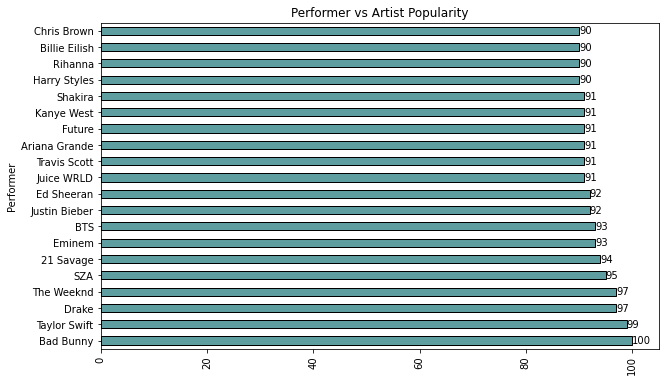

In [27]:
genre_graph_100 = artist_head.plot(figsize=(10,6),
                             x= 'Performer2',
                             y= 'Artist_Popularity',
                             title = 'Performer vs Artist Popularity',
                             xlabel = 'Performer',
                             ylabel = 'Artist Popularity',
                             kind = 'barh',
                             color = 'cadetblue',
                             edgecolor = 'black')
genre_graph_100.get_legend().remove()
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

# Decade vs artist pop

In [28]:
merged_df = merged_df.sort_values('Decade', ascending = True)

In [29]:
merged_df.head()

,Performer,Artist_Popularity,Performer2,uri_x,Genre,url,WeekID,Week Position,Song,SongID,...,Previous Week Position,Peak Position,Weeks on Chart,Explicit,Song_Popularity,Duration ms,uri_y,Year,Decade,Duration s
104267,Kalin Twins,27.0,Kalin Twins,spotify:artist:6LXtFndRkOihPIa2dWY3FH,"['deep adult standards', 'doo-wop']",http://www.billboard.com/charts/hot-100/1958-0...,1958-09-06,21,When,WhenKalin Twins,...,8.0,5,6,False,40.0,146573.0,spotify:track:3HZJ9BLBpDya4p71VfXSWp,1958,1950's,146.573
32030,The Applejacks,27.0,The Applejacks,spotify:artist:27up4HDNmGpKK60gRie2tB,"['beatlesque', 'british invasion', 'merseybeat']",http://www.billboard.com/charts/hot-100/1958-1...,1958-12-27,58,Rocka-Conga,Rocka-CongaThe Applejacks,...,64.0,58,2,False,0.0,141440.0,spotify:track:2o7Bb5GQgWElsdcZqtbqXB,1958,1950's,141.440
94403,The Mystics,28.0,The Mystics,spotify:artist:3IqiRxhyqC3R2STI0RYUOx,"['doo-wop', 'rhythm and blues']",http://www.billboard.com/charts/hot-100/1959-0...,1959-08-08,32,Hushabye,HushabyeThe Mystics,...,36.0,20,12,False,38.0,153240.0,spotify:track:3eBt8USFEAXymBNeOkzhe5,1959,1950's,153.240
23410,Paul Anka,62.0,Paul Anka,spotify:artist:7ceUfdWq2t5nbatS6ollHh,"['adult standards', 'canadian pop', 'easy list...",http://www.billboard.com/charts/hot-100/1959-1...,1959-11-28,40,It's Time To Cry,It's Time To CryPaul Anka,...,74.0,40,2,False,26.0,145466.0,spotify:track:6dAqyQn8GS2RYRqyP5eKTp,1959,1950's,145.466
23411,Paul Anka,62.0,Paul Anka,spotify:artist:7ceUfdWq2t5nbatS6ollHh,"['adult standards', 'canadian pop', 'easy list...",http://www.billboard.com/charts/hot-100/1959-1...,1959-12-12,9,It's Time To Cry,It's Time To CryPaul Anka,...,18.0,9,4,False,26.0,145466.0,spotify:track:6dAqyQn8GS2RYRqyP5eKTp,1959,1950's,145.466


In [30]:
drop_df = merged_df.drop_duplicates(subset = 'uri_y', keep = 'first')

In [31]:
# duration box plot

(0.0, 480.0)

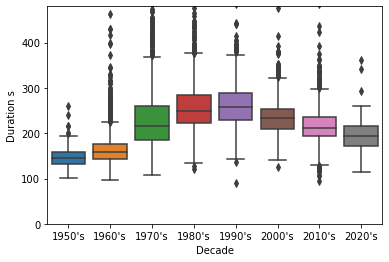

In [32]:
boxplot = sns.boxplot(data= drop_df, x ='Decade', y = 'Duration s')
plt.xlabel('Decade')
plt.ylabel('Duration s')
boxplot.set_ylim(0, 480)

In [33]:
#Song popularity boxplot

Text(0, 0.5, 'Song Popularity')

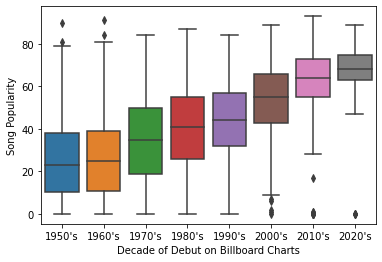

In [34]:
sns.boxplot(data= drop_df, x ='Decade', y = 'Song_Popularity')
plt.xlabel('Decade of Debut on Billboard Charts')
plt.ylabel('Song Popularity')

In [35]:
drop_df = merged_df.drop_duplicates(subset = 'uri_x', keep = 'first')

In [36]:
# Artist Popularity boxplot

Text(0, 0.5, 'Artist Popularity')

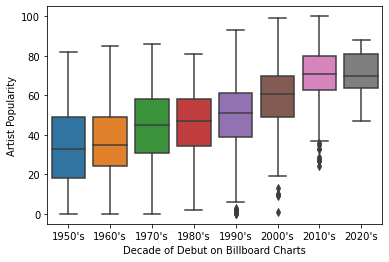

In [37]:
sns.boxplot(data= drop_df, x ='Decade', y = 'Artist_Popularity')
plt.xlabel('Decade of Debut on Billboard Charts')
plt.ylabel('Artist Popularity')

In [38]:
merged_df.shape

(105282, 21)

In [39]:
# Genre Count artist

In [40]:
position = 'SELECT COUNT(Genre) as count, Performer, Artist_Popularity FROM merged_df GROUP BY Performer ORDER BY count DESC'
sqldf(position, globals())
position_df = sqldf(position, globals())
position_df

,count,Performer,Artist_Popularity
0,512,Stevie Wonder,78.0
1,466,Madonna,79.0
2,440,Taylor Swift,99.0
3,433,Drake,97.0
4,426,Elton John,86.0
...,...,...,...
2697,1,Bella Thorne,46.0
2698,1,Bad Meets Evil,63.0
2699,1,Baby Keem,81.0
2700,1,Alabama Shakes,62.0


In [41]:
# Genre Count by Performer

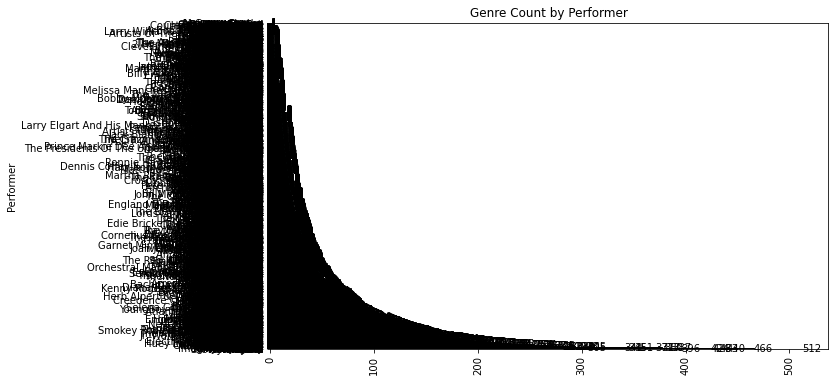

In [42]:
genre_graph_100 = position_df.plot(figsize=(10,6),
                             x= 'Performer',
                             y= 'count',
                             title = 'Genre Count by Performer',
                             xlabel = 'Performer',
                             ylabel = 'Count of Genres',
                             kind = 'barh',
                             color = 'cadetblue',
                             edgecolor = 'black')
genre_graph_100.get_legend().remove()
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

In [43]:
# distinct song count

In [44]:
position = 'SELECT COUNT(DISTINCT Song) as count, Performer FROM merged_df GROUP BY Performer ORDER BY count DESC'
sqldf(position, globals())
position_df = sqldf(position, globals())
position_df

,count,Performer
0,42,Stevie Wonder
1,41,Drake
2,36,Connie Francis
3,33,Elton John
4,32,Madonna
...,...,...
2697,1,504 Boyz
2698,1,3OH!3
2699,1,2nd II None
2700,1,2 Hyped Brothers & A Dog


In [45]:
# distinct week count

In [46]:
position = 'SELECT COUNT(Distinct WeekID) as count, Performer FROM merged_df GROUP BY Performer ORDER BY count DESC'
sqldf(position, globals())
position_df = sqldf(position, globals())
position_df

,count,Performer
0,478,Stevie Wonder
1,426,Madonna
2,417,Elton John
3,348,Maroon 5
4,340,Rihanna
...,...,...
2697,1,Bad Meets Evil
2698,1,Baby Keem
2699,1,Alabama Shakes
2700,1,Al Casey Combo


# weeks count

In [47]:
weeks_count = merged_df.value_counts('Performer').head(20)
pd.DataFrame(weeks_count)

,0
Performer,
Stevie Wonder,512
Madonna,466
Taylor Swift,440
Drake,433
Elton John,426
Rihanna,424
Maroon 5,396
P!nk,387
Nickelback,380


In [48]:
# Performer vs Songs that have charted

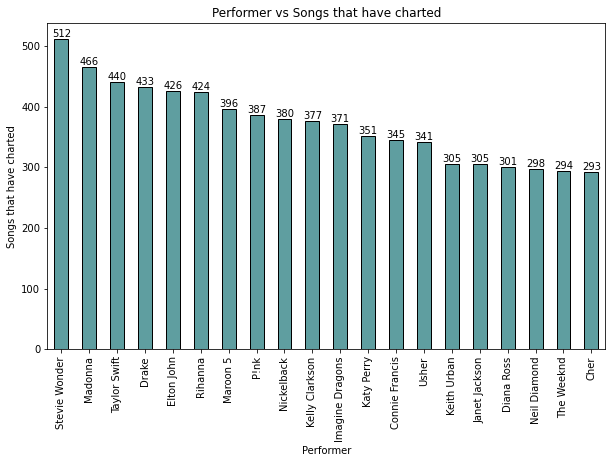

In [49]:
genre_graph_100 = weeks_count.plot(figsize=(10,6),
                             x= 'Performer',
                             y= '0',
                             title = 'Performer vs Songs that have charted',
                             xlabel = 'Performer',
                             ylabel = 'Songs that have charted',
                             kind = 'bar',
                             color = 'cadetblue',
                             edgecolor = 'black')
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

# most popular artists debuted in 70s

In [50]:
merged_df1 = merged_df.loc[merged_df['Year']>=1970].loc[merged_df['Year']<=1979].sort_values('Artist_Popularity', ascending = False).head(5)

In [51]:
merged_df1 = merged_df1.loc[merged_df['Performer']!='M']
merged_df1 = merged_df1.loc[merged_df['Performer']!='Malo']
merged_df1 = merged_df1.loc[merged_df['Performer']!='Ocean']
merged_df1 = merged_df1.loc[merged_df['Performer']!='Q']
merged_df1 = merged_df1.loc[merged_df['Performer']!='Machine']
merged_df1 = merged_df1.loc[merged_df['Performer']!='Pilot']
min_df = merged_df1.groupby(['Performer', 'Artist_Popularity'])['Year'].min().reset_index()
min_df

,Performer,Artist_Popularity,Year
0,Elton John,86.0,1971


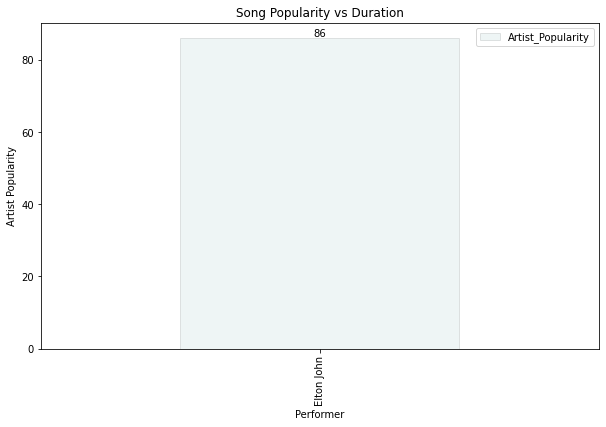

In [52]:
genre_graph_100 = min_df.plot(figsize=(10,6),
                             x= 'Performer',
                             y= 'Artist_Popularity',
                             title = 'Song Popularity vs Duration',
                             xlabel = 'Performer',
                             ylabel = 'Artist Popularity',
                             kind = 'bar',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.1)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

# 1960s

In [53]:
min_df.loc[min_df['Year']>=1960].loc[min_df['Year']<=1969].sort_values('Artist_Popularity', ascending = False).head(5)

,Performer,Artist_Popularity,Year


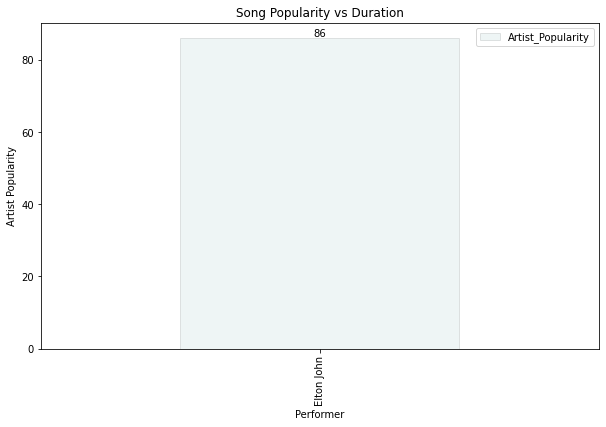

In [54]:
genre_graph_100 = min_df.plot(figsize=(10,6),
                             x= 'Performer',
                             y= 'Artist_Popularity',
                             title = 'Song Popularity vs Duration',
                             xlabel = 'Performer',
                             ylabel = 'Artist Popularity',
                             kind = 'bar',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.1)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

# 1980s

In [55]:
merged_df.loc[merged_df['Year']>=1980].loc[merged_df['Year']<=1989].sort_values('Artist_Popularity', ascending = False).head(5)

,Performer,Artist_Popularity,Performer2,uri_x,Genre,url,WeekID,Week Position,Song,SongID,...,Previous Week Position,Peak Position,Weeks on Chart,Explicit,Song_Popularity,Duration ms,uri_y,Year,Decade,Duration s
34298,Elton John,86.0,Elton John,spotify:artist:3PhoLpVuITZKcymswpck5b,"['glam rock', 'mellow gold', 'piano rock']",http://www.billboard.com/charts/hot-100/1988-1...,1988-12-03,76,A Word In Spanish,A Word In SpanishElton John,...,41.0,19,12,False,34.0,279106.0,spotify:track:1EsN2D481Q3E8vz68nkNoA,1988,1980's,279.106
34598,Elton John,86.0,Elton John,spotify:artist:3PhoLpVuITZKcymswpck5b,"['glam rock', 'mellow gold', 'piano rock']",http://www.billboard.com/charts/hot-100/1989-1...,1989-10-07,25,Healing Hands,Healing HandsElton John,...,32.0,25,7,False,49.0,269960.0,spotify:track:4rxCQMELiiH0gk8nbTd2tR,1989,1980's,269.960
34541,Elton John,86.0,Elton John,spotify:artist:3PhoLpVuITZKcymswpck5b,"['glam rock', 'mellow gold', 'piano rock']",http://www.billboard.com/charts/hot-100/1986-0...,1986-03-22,7,Nikita,NikitaElton John,...,10.0,7,10,False,69.0,343240.0,spotify:track:3G0ENKW9vzV0SuYKaWFflI,1986,1980's,343.240
34542,Elton John,86.0,Elton John,spotify:artist:3PhoLpVuITZKcymswpck5b,"['glam rock', 'mellow gold', 'piano rock']",http://www.billboard.com/charts/hot-100/1986-0...,1986-03-08,13,Nikita,NikitaElton John,...,19.0,13,8,False,69.0,343240.0,spotify:track:3G0ENKW9vzV0SuYKaWFflI,1986,1980's,343.240
34564,Elton John,86.0,Elton John,spotify:artist:3PhoLpVuITZKcymswpck5b,"['glam rock', 'mellow gold', 'piano rock']",http://www.billboard.com/charts/hot-100/1985-0...,1985-02-23,93,In Neon,In NeonElton John,...,83.0,38,13,False,22.0,259200.0,spotify:track:7lt7Ln4T1msZFAOyuLvs1I,1985,1980's,259.200


In [56]:
merged_df2 = merged_df.loc[merged_df['Performer']!='Five']
merged_df2 = merged_df2.loc[merged_df['Performer']!='Link']
min_df = merged_df2.groupby(['Performer', 'Artist_Popularity'])['Year'].min().reset_index()

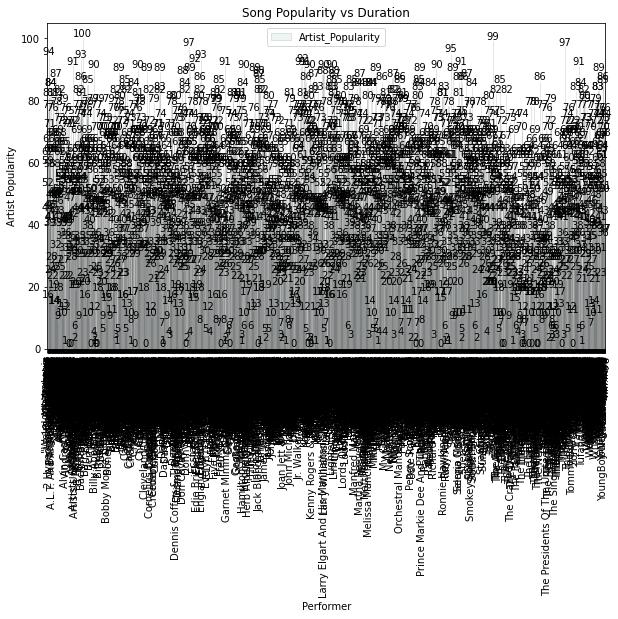

In [57]:
genre_graph_100 = min_df.plot(figsize=(10,6),
                             x= 'Performer',
                             y= 'Artist_Popularity',
                             title = 'Song Popularity vs Duration',
                             xlabel = 'Performer',
                             ylabel = 'Artist Popularity',
                             kind = 'bar',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.1)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

In [58]:
min_df = min_df.loc[min_df['Year']>=1990].loc[min_df['Year']<=1999].sort_values('Artist_Popularity', ascending = False).head(5)
min_df = min_df.groupby(['Performer', 'Artist_Popularity'])['Year'].min().reset_index()

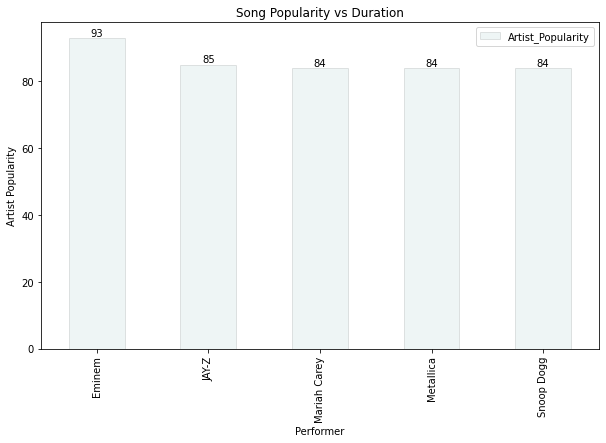

In [59]:
genre_graph_100 = min_df.plot(figsize=(10,6),
                             x= 'Performer',
                             y= 'Artist_Popularity',
                             title = 'Song Popularity vs Duration',
                             xlabel = 'Performer',
                             ylabel = 'Artist Popularity',
                             kind = 'bar',
                             color = 'cadetblue',
                             edgecolor = 'black',
                             alpha = 0.1)
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

# Genre

In [60]:
merged_df.columns

Index(['Performer', 'Artist_Popularity', 'Performer2', 'uri_x', 'Genre', 'url',
       'WeekID', 'Week Position', 'Song', 'SongID', 'Instance',
       'Previous Week Position', 'Peak Position', 'Weeks on Chart', 'Explicit',
       'Song_Popularity', 'Duration ms', 'uri_y', 'Year', 'Decade',
       'Duration s'],
      dtype='object')

In [61]:
# Genre df

In [62]:
genre_df = merged_df[['Performer', 'Artist_Popularity', 'Genre', 'WeekID', 'Song', 'Weeks on Chart', 'Song_Popularity','Decade', 'Duration s', 'Explicit', 'Year']]
genre_df

,Performer,Artist_Popularity,Genre,WeekID,Song,Weeks on Chart,Song_Popularity,Decade,Duration s,Explicit,Year
104267,Kalin Twins,27.0,"['deep adult standards', 'doo-wop']",1958-09-06,When,6,40.0,1950's,146.573,False,1958
32030,The Applejacks,27.0,"['beatlesque', 'british invasion', 'merseybeat']",1958-12-27,Rocka-Conga,2,0.0,1950's,141.440,False,1958
94403,The Mystics,28.0,"['doo-wop', 'rhythm and blues']",1959-08-08,Hushabye,12,38.0,1950's,153.240,False,1959
23410,Paul Anka,62.0,"['adult standards', 'canadian pop', 'easy list...",1959-11-28,It's Time To Cry,2,26.0,1950's,145.466,False,1959
23411,Paul Anka,62.0,"['adult standards', 'canadian pop', 'easy list...",1959-12-12,It's Time To Cry,4,26.0,1950's,145.466,False,1959
...,...,...,...,...,...,...,...,...,...,...,...
64791,Juice WRLD,91.0,"['chicago rap', 'melodic rap']",2020-08-29,Righteous,16,76.0,2020's,242.180,True,2020
64792,Juice WRLD,91.0,"['chicago rap', 'melodic rap']",2020-08-01,Blood On My Jeans,2,70.0,2020's,154.767,True,2020
64793,Juice WRLD,91.0,"['chicago rap', 'melodic rap']",2020-08-08,Blood On My Jeans,3,70.0,2020's,154.767,True,2020
64785,Juice WRLD,91.0,"['chicago rap', 'melodic rap']",2020-05-30,Righteous,4,76.0,2020's,242.180,True,2020


In [63]:
# drop duplicates

In [64]:
genre_df = genre_df.drop_duplicates(subset= ['Song', 'Performer'], keep= 'first')
genre_df

,Performer,Artist_Popularity,Genre,WeekID,Song,Weeks on Chart,Song_Popularity,Decade,Duration s,Explicit,Year
104267,Kalin Twins,27.0,"['deep adult standards', 'doo-wop']",1958-09-06,When,6,40.0,1950's,146.573,False,1958
32030,The Applejacks,27.0,"['beatlesque', 'british invasion', 'merseybeat']",1958-12-27,Rocka-Conga,2,0.0,1950's,141.440,False,1958
94403,The Mystics,28.0,"['doo-wop', 'rhythm and blues']",1959-08-08,Hushabye,12,38.0,1950's,153.240,False,1959
23410,Paul Anka,62.0,"['adult standards', 'canadian pop', 'easy list...",1959-11-28,It's Time To Cry,2,26.0,1950's,145.466,False,1959
90755,Stonewall Jackson,42.0,"['classic country pop', 'honky tonk']",1959-05-30,Waterloo,2,36.0,1950's,146.933,False,1959
...,...,...,...,...,...,...,...,...,...,...,...
64796,Juice WRLD,91.0,"['chicago rap', 'melodic rap']",2020-08-01,Titanic,2,67.0,2020's,176.649,True,2020
64797,Juice WRLD,91.0,"['chicago rap', 'melodic rap']",2020-08-01,Stay High,2,74.0,2020's,168.684,True,2020
64798,Juice WRLD,91.0,"['chicago rap', 'melodic rap']",2020-08-01,Bad Energy,2,68.0,2020's,186.749,True,2020
64795,Juice WRLD,91.0,"['chicago rap', 'melodic rap']",2020-08-01,Screw Juice,2,65.0,2020's,179.464,True,2020


In [65]:
# explode

In [66]:
genre_df['Genre'] = genre_df['Genre'].apply(literal_eval)
genre_df = genre_df.explode(column = "Genre")
genre_df = genre_df.dropna()
genre_df

/var/folders/91/wchv5p25455f2k8078kdjvm40000gn/T/ipykernel_47690/3628041093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df['Genre'] = genre_df['Genre'].apply(literal_eval)


,Performer,Artist_Popularity,Genre,WeekID,Song,Weeks on Chart,Song_Popularity,Decade,Duration s,Explicit,Year
104267,Kalin Twins,27.0,deep adult standards,1958-09-06,When,6,40.0,1950's,146.573,False,1958
104267,Kalin Twins,27.0,doo-wop,1958-09-06,When,6,40.0,1950's,146.573,False,1958
32030,The Applejacks,27.0,beatlesque,1958-12-27,Rocka-Conga,2,0.0,1950's,141.440,False,1958
32030,The Applejacks,27.0,british invasion,1958-12-27,Rocka-Conga,2,0.0,1950's,141.440,False,1958
32030,The Applejacks,27.0,merseybeat,1958-12-27,Rocka-Conga,2,0.0,1950's,141.440,False,1958
...,...,...,...,...,...,...,...,...,...,...,...
64798,Juice WRLD,91.0,melodic rap,2020-08-01,Bad Energy,2,68.0,2020's,186.749,True,2020
64795,Juice WRLD,91.0,chicago rap,2020-08-01,Screw Juice,2,65.0,2020's,179.464,True,2020
64795,Juice WRLD,91.0,melodic rap,2020-08-01,Screw Juice,2,65.0,2020's,179.464,True,2020
64794,Juice WRLD,91.0,chicago rap,2020-08-15,Blood On My Jeans,4,70.0,2020's,154.767,True,2020


In [67]:
genre_df = genre_df.reset_index(drop = True)

In [68]:
# Genre Count Artist

In [69]:
position = 'SELECT COUNT(Genre) as count, Performer, Artist_Popularity FROM genre_df GROUP BY Performer ORDER BY count DESC'
sqldf(position, globals())
position_df = sqldf(position, globals())
position_df

,count,Performer,Artist_Popularity
0,224,The Moody Blues,60.0
1,224,Four Tops,64.0
2,210,Stevie Wonder,78.0
3,205,Drake,97.0
4,196,Neil Diamond,69.0
...,...,...,...
2383,1,Alex Clare,54.0
2384,1,Alan Walker,82.0
2385,1,Afrique,27.0
2386,1,69 Boyz,41.0


In [70]:
position_df_head = position_df.head(20)
position_df_head

,count,Performer,Artist_Popularity
0,224,The Moody Blues,60.0
1,224,Four Tops,64.0
2,210,Stevie Wonder,78.0
3,205,Drake,97.0
4,196,Neil Diamond,69.0
5,189,Jackie Wilson,61.0
6,184,Jerry Butler,40.0
7,182,Steve Winwood,61.0
8,180,Connie Francis,55.0
9,171,Styx,63.0


In [71]:
# Genre count performer

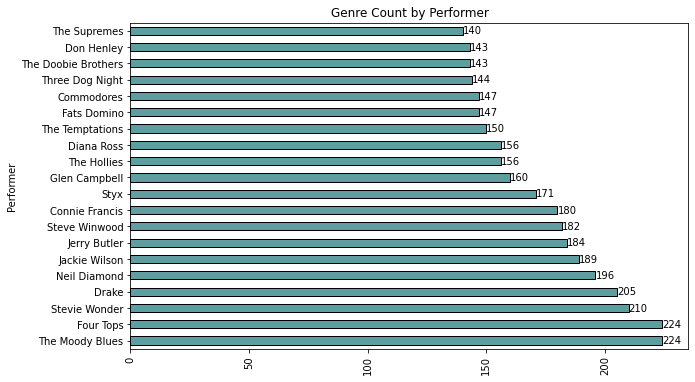

In [72]:
genre_graph_100 = position_df_head.plot(figsize=(10,6),
                             x= 'Performer',
                             y= 'count',
                             title = 'Genre Count by Performer',
                             xlabel = 'Performer',
                             ylabel = 'Count of Genres',
                             kind = 'barh',
                             color = 'cadetblue',
                             edgecolor = 'black')
genre_graph_100.get_legend().remove()
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

In [73]:
genre_df_head = genre_df.value_counts('Genre').head(20)
pd.DataFrame(genre_df_head)

,0
Genre,
mellow gold,1614
soft rock,1505
adult standards,1438
rock,1165
classic rock,1096
soul,1068
album rock,953
dance pop,885
quiet storm,850


In [74]:
# Song count for genre

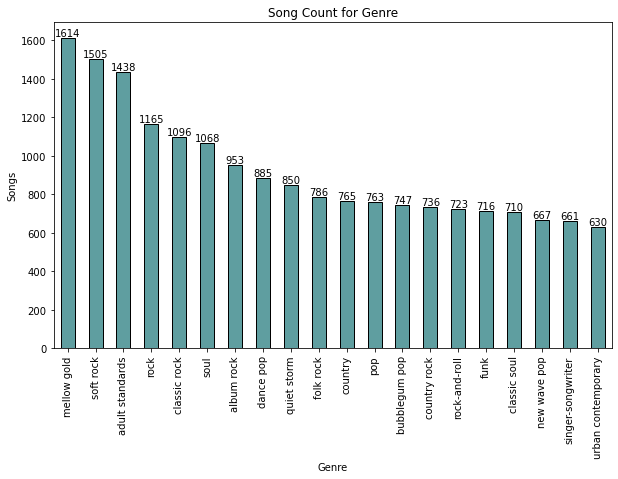

In [75]:
genre_graph_100 = genre_df_head.plot(figsize=(10,6),
                             x= 'Genre',
                             y= '0',
                             title = 'Song Count for Genre',
                             xlabel = 'Genre',
                             ylabel = 'Songs',
                             kind = 'bar',
                             color = 'cadetblue',
                             edgecolor = 'black')
for bars in genre_graph_100.containers:
    genre_graph_100.bar_label(bars)
plt.xticks(rotation = 90);

In [76]:
# 60s explicit

In [77]:
genre_df_sort_values = genre_df.sort_values('Decade', ascending = True)
genre_df_sort_values

,Performer,Artist_Popularity,Genre,WeekID,Song,Weeks on Chart,Song_Popularity,Decade,Duration s,Explicit,Year
0,Kalin Twins,27.0,deep adult standards,1958-09-06,When,6,40.0,1950's,146.573,False,1958
557,The Everly Brothers,61.0,rockabilly,1959-05-16,Poor Jenny,8,15.0,1950's,131.533,False,1959
558,The Everly Brothers,61.0,sunshine pop,1959-05-16,Poor Jenny,8,15.0,1950's,131.533,False,1959
559,Jimmie Rodgers,41.0,yodeling,1959-06-27,Ring-A-Ling-A-Lario,5,11.0,1950's,143.733,False,1959
560,Jimmie Rodgers,41.0,yodeling,1958-11-15,Bimbombey,2,29.0,1950's,137.600,False,1958
...,...,...,...,...,...,...,...,...,...,...,...
39633,Lil Mosey,72.0,rap,2020-08-29,Blueberry Faygo,28,76.0,2020's,162.546,True,2020
39632,Lil Mosey,72.0,melodic rap,2020-08-29,Blueberry Faygo,28,76.0,2020's,162.546,True,2020
39631,Billie Eilish,90.0,pop,2021-01-09,Therefore I Am,8,0.0,2020's,174.321,False,2021
39629,Billie Eilish,90.0,art pop,2021-01-09,Therefore I Am,8,0.0,2020's,174.321,False,2021


In [78]:
# explicit count

In [79]:
genre_df_value = genre_df_sort_values.value_counts(['Decade', 'Explicit'])
genre_df_value = pd.DataFrame(genre_df_value)
genre_df_value = genre_df_value.sort_values('Decade', ascending = True)
genre_df_value

0
Decade Explicit      
1950's False      845
1960's False     8447
1970's False     8771
       True        25
1980's False     8293
       True        34
1990's False     4242
       True       558
2000's False     3586
       True       796
2010's False     2626
       True      1274
2020's False      230
       True       195

In [80]:
# 1960s graph

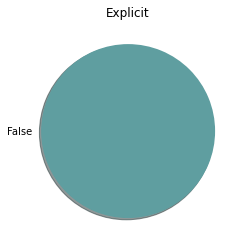

In [81]:
values = [845]
colors = ['cadetblue']
labels = ['False']

plt.pie(values, colors=colors, labels=labels,

counterclock=False, shadow=True)
plt.title('Explicit')
plt.show()

In [84]:
# 1960 popularity

In [85]:
sixties = genre_df.loc[genre_df['Year']>=1958].loc[genre_df['Year']<=1969].value_counts('Song_Popularity', ascending = False)
sixties_head = sixties.head(20)
sixties_head = pd.DataFrame(sixties_head)
sixties_head

,0
Song_Popularity,
13.0,237
29.0,225
30.0,221
35.0,218
27.0,215
33.0,213
12.0,196
21.0,193
22.0,191


In [86]:
# 1970 popularity

In [87]:
sixties = genre_df.loc[genre_df['Year']>=1970].loc[genre_df['Year']<=1979].value_counts('Song_Popularity', ascending = False)
sixties_head = sixties.head(20)
sixties_head = pd.DataFrame(sixties_head)
sixties_head

,0
Song_Popularity,
45.0,245
50.0,203
36.0,196
20.0,189
18.0,181
51.0,178
34.0,177
29.0,170
33.0,170


In [88]:
#1980 popularity

In [89]:
sixties = genre_df.loc[genre_df['Year']>=1980].loc[genre_df['Year']<=1989].value_counts('Song_Popularity', ascending = False)
sixties_head = sixties.head(20)
sixties_head = pd.DataFrame(sixties_head)
sixties_head

,0
Song_Popularity,
56.0,250
39.0,203
41.0,200
38.0,198
42.0,193
26.0,190
45.0,183
46.0,182
48.0,181


In [90]:
# 1990s popularity

In [91]:
sixties = genre_df.loc[genre_df['Year']>=1990].loc[genre_df['Year']<=1999].value_counts('Song_Popularity', ascending = False)
sixties_head = sixties.head(20)
sixties_head = pd.DataFrame(sixties_head)
sixties_head

,0
Song_Popularity,
37.0,136
34.0,131
57.0,130
62.0,129
45.0,128
53.0,127
54.0,122
32.0,122
56.0,117


In [92]:
#2000s popularity

In [93]:
sixties = genre_df.loc[genre_df['Year']>=2000].loc[genre_df['Year']<=2009].value_counts('Song_Popularity', ascending = False)
sixties_head = sixties.head(20)
sixties_head = pd.DataFrame(sixties_head)
sixties_head

,0
Song_Popularity,
59.0,157
61.0,149
52.0,138
57.0,138
58.0,133
51.0,117
47.0,112
68.0,107
69.0,105


In [94]:
# 2010 popularity

In [95]:
sixties = genre_df.loc[genre_df['Year']>=2010].loc[genre_df['Year']<=2019].value_counts('Song_Popularity', ascending = False)
sixties_head = sixties.head(20)
sixties_head = pd.DataFrame(sixties_head)
sixties_head

,0
Song_Popularity,
64.0,151
65.0,142
59.0,137
60.0,136
61.0,135
63.0,125
67.0,124
66.0,121
73.0,117


In [96]:
sixties = genre_df.loc[genre_df['Year']>=1970].loc[genre_df['Year']<=1979].value_counts('Song_Popularity', ascending = False)
sixties_head = sixties.head(20)
sixties_head = pd.DataFrame(sixties_head)
sixties_head

,0
Song_Popularity,
45.0,245
50.0,203
36.0,196
20.0,189
18.0,181
51.0,178
34.0,177
29.0,170
33.0,170


In [97]:
# 1960s

In [98]:
sixties = genre_df.loc[genre_df['Year']>=1958].loc[genre_df['Year']<=1969].value_counts('Genre', ascending = False)
sixties_head = sixties.head(20)
sixties_head = pd.DataFrame(sixties_head)
sixties_head

,0
Genre,
adult standards,834
rock-and-roll,660
soul,547
bubblegum pop,473
rockabilly,432
classic soul,393
rhythm and blues,360
lounge,265
merseybeat,262


In [99]:
# 1970s 

In [100]:
sixties = genre_df.loc[genre_df['Year']>=1970].loc[genre_df['Year']<=1979].value_counts('Genre', ascending = False)
sixties_head = sixties.head(20)
sixties_head = pd.DataFrame(sixties_head)
sixties_head

,0
Genre,
mellow gold,595
soft rock,559
classic rock,416
adult standards,387
folk rock,363
soul,356
funk,323
quiet storm,323
country rock,318


In [101]:
# 1980s

In [102]:
sixties = genre_df.loc[genre_df['Year']>=1980].loc[genre_df['Year']<=1989].value_counts('Genre', ascending = False)
sixties_head = sixties.head(20)
sixties_head = pd.DataFrame(sixties_head)
sixties_head

,0
Genre,
soft rock,696
mellow gold,659
album rock,492
new wave pop,454
rock,448
classic rock,422
hard rock,235
new romantic,225
singer-songwriter,215


In [103]:
# 1990s

In [104]:
sixties = genre_df.loc[genre_df['Year']>=1990].loc[genre_df['Year']<=1999].value_counts('Genre', ascending = False)
sixties_head = sixties.head(20)
sixties_head = pd.DataFrame(sixties_head)
sixties_head

,0
Genre,
urban contemporary,242
contemporary r&b,208
r&b,196
rock,182
pop rock,159
hip hop,150
dance pop,145
hip pop,138
new wave pop,132


In [105]:
# 2000

In [106]:
sixties = genre_df.loc[genre_df['Year']>=2000].loc[genre_df['Year']<=2009].value_counts('Genre', ascending = False)
sixties_head = sixties.head(20)
sixties_head = pd.DataFrame(sixties_head)
sixties_head

,0
Genre,
dance pop,305
country,250
country road,221
contemporary country,217
pop,199
urban contemporary,180
r&b,149
pop rock,125
hip pop,124


In [107]:
#2010s

In [108]:
sixties = genre_df.loc[genre_df['Year']>=2010].loc[genre_df['Year']<=2019].value_counts('Genre', ascending = False)
sixties_head = sixties.head(20)
sixties_head = pd.DataFrame(sixties_head)
sixties_head

,0
Genre,
pop,440
dance pop,287
contemporary country,286
country,281
country road,252
rap,210
post-teen pop,114
hip hop,109
trap,108


In [109]:
# Genre explicitness

In [110]:
genre_df.groupby('Genre')['Explicit'].mean().loc['country']

0.00130718954248366

In [111]:
genre_df.groupby('Genre')['Explicit'].mean().loc['pop']

0.1598951507208388

In [112]:
genre_df.groupby('Genre')['Explicit'].mean().loc['rock']

0.017167381974248927

In [113]:
genre_df.groupby('Genre')['Explicit'].mean().loc['mellow gold']

0.0024783147459727386

In [114]:
genre_df.groupby('Genre')['Explicit'].mean().loc['rap']

0.8439024390243902